In [ ]:
import pandas                                     as pd
import math
import numpy                                      as np
import seaborn                                    as sns
import matplotlib.pyplot                          as plt
import matplotlib.gridspec                        as gridspec

import datetime
from IPython.display       import Image
from IPython.core.display  import HTML

from imblearn              import over_sampling   as os
from imblearn              import combine         as c
from sklearn.manifold      import TSNE
from sklearn               import model_selection as ms
from sklearn               import ensemble        as en
import random
from sklearn               import metrics         as m
from sklearn               import neighbors       as nb
from sklearn               import linear_model    as lm
from sklearn               import svm

import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import os
cwd = os.getcwd()
import numpy as np
import pandas as pd
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
df_cols_name = pd.read_csv('/content/features.txt', sep="          ", header=None)
cols_name = df_cols_name[0].tolist()

In [ ]:
df_X_raw = pd.read_csv('/content/X_train.txt', sep=" ", header=None)
df_y_raw = pd.read_csv('/content/y_train.txt', sep=" ", header=None)
df_subject_raw = pd.read_csv('/content/subject_id_train.txt', sep=" ", header=None)


df2_X_raw=pd.read_csv('/content/X_test.txt', sep=" ", header=None)
df2_y_raw = pd.read_csv('/content/y_test.txt', sep=" ", header=None)
df2_subject_raw = pd.read_csv('/content/subject_id_test.txt', sep=" ", header=None)

df_X_raw.columns = cols_name
df2_X_raw.columns = cols_name
# join
df_raw = df_X_raw
df_raw['subject'] = df_subject_raw
df_raw['position'] = df_y_raw

df2_raw = df2_X_raw
df2_raw['subject'] = df2_subject_raw
df2_raw['position'] = df2_y_raw

In [ ]:
df_X_raw.isna().sum()
df_y_raw.isna().sum()
df2_raw.isna().sum()
#there are no missing values therefore we wont be using imputations technniques

tBodyAcc-Mean-1                0
tBodyAcc-Mean-2                0
tBodyAcc-Mean-3                0
tBodyAcc-STD-1                 0
tBodyAcc-STD-2                 0
                              ..
tXAxisAcc-AngleWRTGravity-1    0
tYAxisAcc-AngleWRTGravity-1    0
tZAxisAcc-AngleWRTGravity-1    0
subject                        0
position                       0
Length: 563, dtype: int64

In [ ]:
#This will help us later when we want to divide the datasets between the different activities
df_transition=df_raw
df_moving=df_raw
df_stationary=df_raw

In [ ]:
# To make the exploration of the data that we are going to do later on, I will replace the numbers contained in the target column with their respective references.
# This relation is contained in the file "activity_labels"

df_raw['position'] = df_raw['position'].map( {  1 : 'WALKING',
                                            2 : 'WALKING_UPSTAIRS',
                                            3 : 'WALKING_DOWNSTAIRS',
                                            4 : 'SITTING',
                                            5 : 'STANDING',
                                            6 : 'LAYING',
                                            7 : 'STAND_TO_SIT',
                                            8 : 'SIT_TO_STAND',
                                            9 : 'SIT_TO_LIE',
                                            10 : 'LIE_TO_SIT',
                                            11 : 'STAND_TO_LIE',
                                            12 : 'LIE_TO_STAND' } )

In [ ]:
df1 = df_raw.copy()

In [ ]:
df_balance = df1[['subject', 'position']].groupby( 'position' ).count().sort_values( 'subject' ).reset_index()
df_balance['perc%'] = 100*np.round( ( df_balance['subject'] / np.sum( df_balance['subject'] ) ), 4 )

In [ ]:
df_balance
#As you can see the model will have a great bias between absolute movements(such as sitting,standing,laying)and transitioning movements
#such as sitting to stand or standing to sit

,position,subject,perc%
0,SIT_TO_STAND,23,0.30
1,STAND_TO_SIT,47,0.61
2,LIE_TO_STAND,57,0.73
3,LIE_TO_SIT,60,0.77
4,SIT_TO_LIE,75,0.97
5,STAND_TO_LIE,90,1.16
6,WALKING_DOWNSTAIRS,987,12.71
7,WALKING_UPSTAIRS,1073,13.81
8,WALKING,1226,15.78
9,SITTING,1293,16.65


In [ ]:
df_raw.duplicated().any()
df2_raw.duplicated().any()
#There are no duplicates no elimination techniques

False

In [ ]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [ ]:
df51=df_raw

In [ ]:
X_for_tsne = df51.drop(['subject', 'position'], axis=1)
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

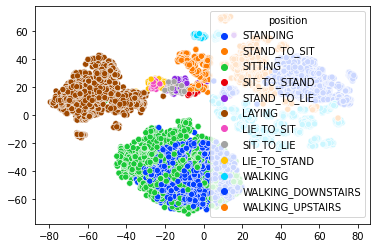

In [ ]:
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df51["position"],palette="bright")
#There are no categorical variables therefore we cant do correlations between them

In [ ]:
df_featureselection=df_raw

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_featureselection.iloc[:, 1:].values, df_y_raw.iloc[:,0].values

X_train, y_train, X_test, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)


In [ ]:

X_train = df_raw.drop(['subject', 'position'], axis=1)
X_test= df2_raw.drop(['subject', 'position'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
test=df2_raw
train=df_raw

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [ ]:

x = train.drop(['position'],axis=1)
x = StandardScaler().fit_transform(x)
y = train['position']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

xTest = test.drop(['position'],axis=1)
xTest = StandardScaler().fit_transform(xTest)
yTest = test['position']
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']


In [ ]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

Feature 0: 1846.141886
Feature 1: 994.276974
Feature 2: 482.324757
Feature 3: 6101.227645
Feature 4: 3602.956706
Feature 5: 1991.801000
Feature 6: 5285.261559
Feature 7: 3282.558718
Feature 8: 1940.587314
Feature 9: 7061.053851
Feature 10: 2344.844160
Feature 11: 1581.414224
Feature 12: 3121.650240
Feature 13: 2560.269784
Feature 14: 1316.167103
Feature 15: 5369.897721
Feature 16: 1841.009886
Feature 17: 1151.842763
Feature 18: 604.588464
Feature 19: 3124.492623
Feature 20: 2252.421369
Feature 21: 1616.274431
Feature 22: 1669.936494
Feature 23: 1578.748094
Feature 24: 945.749381
Feature 25: 790.756632
Feature 26: 327.291159
Feature 27: 106.585999
Feature 28: 82.581196
Feature 29: 348.643459
Feature 30: 275.621028
Feature 31: 43.368624
Feature 32: 16.404284
Feature 33: 359.534288
Feature 34: 271.087434
Feature 35: 69.895934
Feature 36: 50.877132
Feature 37: 217.333398
Feature 38: 39.961299
Feature 39: 187.243154
Feature 40: 9632.338437
Feature 41: 2050.293458
Feature 42: 609.171564
Feat

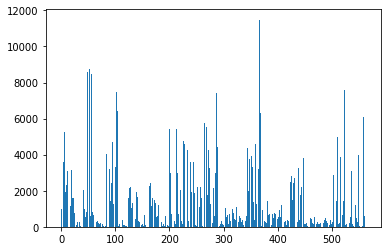

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
for i in range(len(df_cols_name)):
  print(df_cols_name[0][i])

Feature 3: 0.909832
Feature 9: 1.024256
Feature 50: 0.914213
Feature 53: 0.920910
Feature 83: 0.906538
Feature 89: 0.959000
Feature 96: 0.905287
Feature 268: 0.912095
Feature 271: 0.923572
Feature 281: 0.909939
Feature 302: 0.911392
Feature 310: 0.917370
Feature 314: 0.911575
Feature 360: 0.905521
Feature 381: 0.966483
Feature 389: 0.953626
Feature 393: 0.915821


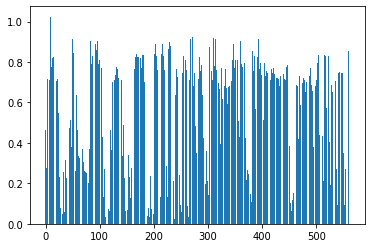

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)
ft=[]

# what are scores for the features
for i in range(len(fs.scores_)):
  if fs.scores_[i] >0.9:
    print('Feature %d: %f' % (i, fs.scores_[i]))
    ft+=[df_cols_name[0][i]]
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
def is_duplicate(anylist):
    if type(anylist) != 'list':
        return("Error. Passed parameter is Not a list")
    if len(anylist) != len(set(anylist)):
        return True
    else:
        return False
if is_duplicate(ft):
    print("duplicates found in list")
else:
    print("no duplicates found in list")

duplicates found in list


In [ ]:

myunique = set(ft) # prints the final list without any duplicates
print(myunique)

{'fBodyAccJerk-Energy-1', 'tBodyAccJerk-STD-1', 'fBodyAcc-Energy-1', 'tGravityAcc-Max-2', 'tBodyAccJerk-Energy-1', 'tBodyAcc-Max-1', 'fBodyAcc-Mad-1', 'fBodyAcc-BandsEnergyOld-1', 'fBodyAcc-BandsEnergyOld-9', 'fBodyAccJerk-BandsEnergyOld-9', 'fBodyAccJerk-BandsEnergyOld-13', 'fBodyAcc-BandsEnergyOld-13', 'tBodyAcc-STD-1', 'fBodyAccJerk-BandsEnergyOld-1', 'tGravityAcc-Min-2', 'fBodyAcc-STD-1', 'tBodyAccJerk-Max-1'}


In [ ]:
#for some reason removing duplicates did not work at all so I did it the hard way, this code wont run I just put it at evidence
x1, xTest1 = train.filter(items=myunique), test.filter(items=myunique)

ValueError: ignored

In [ ]:
for i in myunique:
  print("'"+i+"'"+",")

'fBodyAccJerk-Energy-1',
'tBodyAccJerk-STD-1',
'fBodyAcc-Energy-1',
'tGravityAcc-Max-2',
'tBodyAccJerk-Energy-1',
'tBodyAcc-Max-1',
'fBodyAcc-Mad-1',
'fBodyAcc-BandsEnergyOld-1',
'fBodyAcc-BandsEnergyOld-9',
'fBodyAccJerk-BandsEnergyOld-9',
'fBodyAccJerk-BandsEnergyOld-13',
'fBodyAcc-BandsEnergyOld-13',
'tBodyAcc-STD-1',
'fBodyAccJerk-BandsEnergyOld-1',
'tGravityAcc-Min-2',
'fBodyAcc-STD-1',
'tBodyAccJerk-Max-1',


In [ ]:
xfirstrain=df1[['fBodyAccJerk-Energy-1',
'fBodyAccJerk-BandsEnergyOld-1',
'fBodyAcc-STD-1',
'fBodyAcc-Mad-1',
'tBodyAccJerk-STD-1',
'fBodyAcc-Energy-1',
'tGravityAcc-Min-2',
'fBodyAcc-BandsEnergyOld-13',
'fBodyAccJerk-BandsEnergyOld-9',
'tBodyAcc-STD-1',
'tBodyAccJerk-Max-1',
'tBodyAccJerk-Energy-1',
'fBodyAcc-BandsEnergyOld-1',
'fBodyAccJerk-BandsEnergyOld-13',
'fBodyAcc-BandsEnergyOld-9',
'tBodyAcc-Max-1',
'tGravityAcc-Max-2']]

In [ ]:
xfirstrain = xfirstrain.loc[:,~xfirstrain.columns.duplicated()]

In [ ]:
xfirstest=df2_raw[['fBodyAccJerk-Energy-1',
'fBodyAccJerk-BandsEnergyOld-1',
'fBodyAcc-STD-1',
'fBodyAcc-Mad-1',
'tBodyAccJerk-STD-1',
'fBodyAcc-Energy-1',
'tGravityAcc-Min-2',
'fBodyAcc-BandsEnergyOld-13',
'fBodyAccJerk-BandsEnergyOld-9',
'tBodyAcc-STD-1',
'tBodyAccJerk-Max-1',
'tBodyAccJerk-Energy-1',
'fBodyAcc-BandsEnergyOld-1',
'fBodyAccJerk-BandsEnergyOld-13',
'fBodyAcc-BandsEnergyOld-9',
'tBodyAcc-Max-1',
'tGravityAcc-Max-2']]

In [ ]:
xfirstest = xfirstest.loc[:,~xfirstest.columns.duplicated()]
y=pd.read_csv('/content/y_train.txt', sep=" ", header=None)
y2=pd.read_csv('/content/y_test.txt', sep=" ", header=None)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve
import pandas as pd

In [ ]:
# Create an instance of the logistic regression, decision tree, and gradient boosting classifiers.

# Supervised learning algorithm used for classification, to model the probability such as win/lose or healthy/sick
log_clf = LogisticRegression()

# Supervised learning algorithm used for classification
tree_clf = DecisionTreeClassifier()

# Supervised learning algorithm can be used for both classification and regression problems.
xgb_clf = XGBClassifier()

#upervised learning algorithm  can be used for both classification and regression problems.
knn_clf = KNeighborsClassifier()

In [ ]:

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', tree_clf), ('xgb', xgb_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(xfirstrain,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xfirstrain, y, test_size=0.2)
y_pred_proba = voting_clf.predict_proba(xfirstrain)

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(xfirstrain, y)
preds = clf.predict_proba(xfirstrain)
roc_auc = roc_auc_score(y,preds, multi_class='ovr')
print(roc_auc)
#after using the features the model has a logistic regression performance of 98.5% which is pretty solid

0.985199333040958


In [ ]:
accuracy = voting_clf.score(X_test, y_test)
accuracy
#the accuracy of the logistic model is of 98.5% after the implementation of the features which is pretty neat

0.9813384813384813

In [ ]:
# model definition
model_lg = lm.LogisticRegression( n_jobs=-1, random_state=32 )

# train model
model_lg.fit( X_train, y_train )

LogisticRegression(n_jobs=-1, random_state=32)

In [ ]:
%pip install scikit-plot
from scikitplot            import metrics         as mt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


              precision    recall  f1-score   support

           1      0.877     0.902     0.890       246
           2      0.842     0.854     0.848       212
           3      0.898     0.912     0.905       194
           4      0.817     0.722     0.766       266
           5      0.796     0.889     0.840       280
           6      0.863     0.893     0.878       281
           7      0.000     0.000     0.000         7
           8      0.000     0.000     0.000         5
           9      0.571     0.533     0.552        15
          10      0.455     0.714     0.556        14
          11      0.833     0.263     0.400        19
          12      0.286     0.133     0.182        15

    accuracy                          0.835      1554
   macro avg      0.603     0.568     0.568      1554
weighted avg      0.828     0.835     0.828      1554

Accuracy: 0.8346203346203346
Weighted F1-Score: 0.8277171374999786
Balanced Accuracy Score: 0.5680852232277798
Kappa Score: 0.8038625

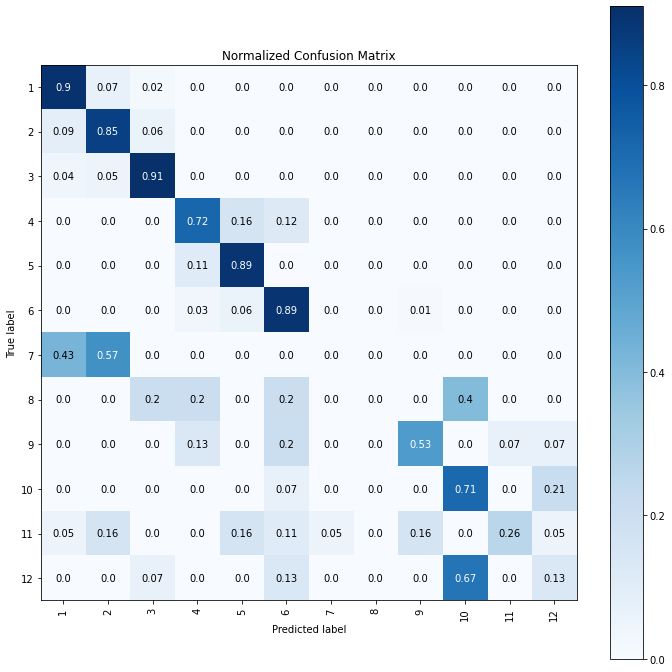

In [ ]:
# prediction
yhat = model_lg.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')
# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#the accuracy in the

#The accuracy is 83% which is not bad but not perfect, activity number 7 stando to sit is hard to predict.

In [ ]:
# model definition
model_knn = nb.KNeighborsClassifier( n_neighbors=2, n_jobs=-1 )

# train model
model_knn.fit( xfirstrain, y )

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [ ]:
# prediction
yhat = model_knn.predict( X_test )

              precision    recall  f1-score   support

           1      0.946     1.000     0.972       246
           2      0.981     0.953     0.967       212
           3      1.000     0.964     0.982       194
           4      0.914     1.000     0.955       266
           5      0.978     0.946     0.962       280
           6      0.985     0.954     0.969       281
           7      0.750     0.857     0.800         7
           8      0.800     0.800     0.800         5
           9      0.667     0.800     0.727        15
          10      0.560     1.000     0.718        14
          11      1.000     0.421     0.593        19
          12      1.000     0.200     0.333        15

    accuracy                          0.953      1554
   macro avg      0.882     0.825     0.815      1554
weighted avg      0.959     0.953     0.951      1554

Accuracy: 0.953024453024453
Weighted F1-Score: 0.9505146227615661
Balanced Accuracy Score: 0.8245923691172572
Kappa Score: 0.94440180

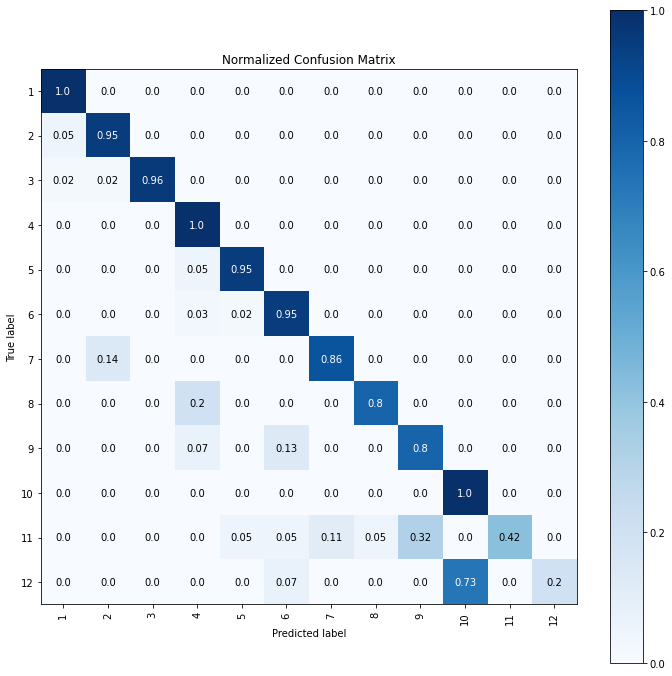

In [ ]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

#Activity number is better represent but it is still giving a lot of trouble compared to the rest, and activity number 11 and 12 are not well represented at all.
#These are stand to lie and lie to stand

In [ ]:
balanced_acc_list = []
for i in range( 1, 30 ):
    print( 'K-value: {}'.format( i ) )
    # model definition
    model_knn = nb.KNeighborsClassifier( n_neighbors=i, n_jobs=-1 )

    # train model
    model_knn.fit( xfirstrain, y )

    # prediction
    yhat = model_knn.predict( X_test )

    # Balanced Accuracy Score
    balanced_acc_list.append( m.balanced_accuracy_score( y_test, yhat ) )

K-value: 1
K-value: 2
K-value: 3
K-value: 4
K-value: 5
K-value: 6
K-value: 7
K-value: 8
K-value: 9
K-value: 10
K-value: 11
K-value: 12
K-value: 13
K-value: 14
K-value: 15
K-value: 16
K-value: 17
K-value: 18
K-value: 19
K-value: 20
K-value: 21
K-value: 22
K-value: 23
K-value: 24
K-value: 25
K-value: 26
K-value: 27
K-value: 28
K-value: 29


Text(0, 0.5, 'Balanced Accuracy')

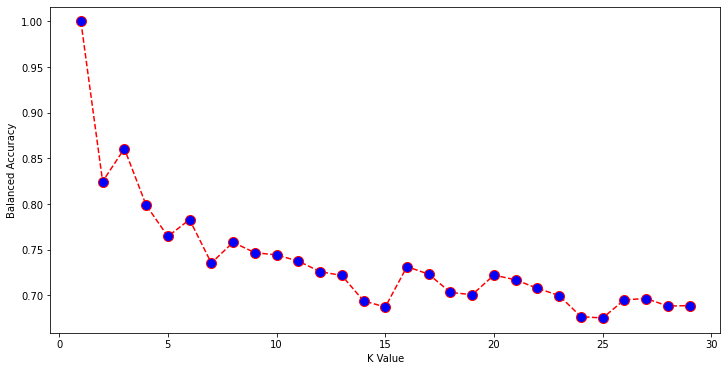

In [ ]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 30 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel( 'K Value' )
plt.ylabel( 'Balanced Accuracy' )
#As we can see the balance accuracy is not great so I dont use this model

In [ ]:
# model definition
model_svm = svm.SVC(random_state=32)

# model training
model_svm.fit( xfirstrain, y )

SVC(random_state=32)

              precision    recall  f1-score   support

           1      0.888     0.939     0.913       246
           2      0.869     0.844     0.856       212
           3      0.926     0.907     0.917       194
           4      0.776     0.756     0.766       266
           5      0.808     0.889     0.847       280
           6      0.901     0.840     0.869       281
           7      0.444     0.571     0.500         7
           8      1.000     0.400     0.571         5
           9      0.500     0.600     0.545        15
          10      0.562     0.643     0.600        14
          11      0.636     0.368     0.467        19
          12      0.615     0.533     0.571        15

    accuracy                          0.844      1554
   macro avg      0.744     0.691     0.702      1554
weighted avg      0.845     0.844     0.843      1554

Accuracy: 0.8436293436293436
Weighted F1-Score: 0.8426442389211792
Balanced Accuracy Score: 0.6909502559380855
Kappa Score: 0.8149544

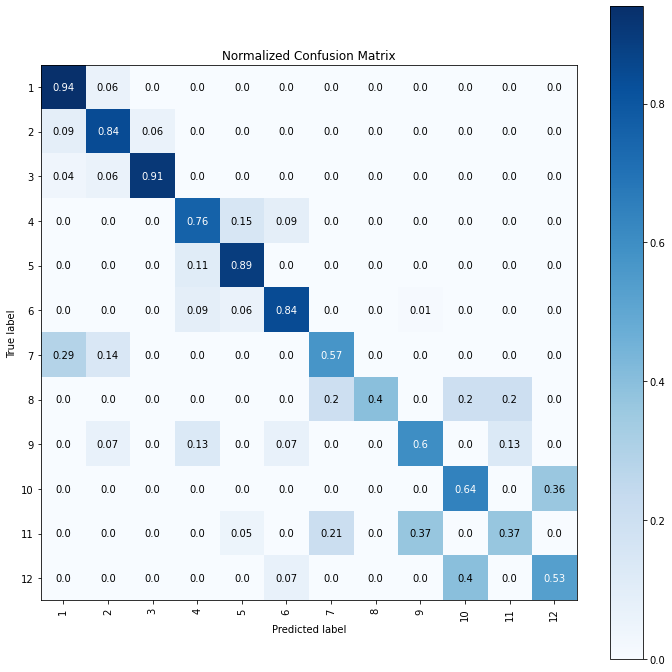

In [ ]:
# prediction
yhat = model_svm.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#The accuracy for SVM is good but not the best

In [ ]:
y_movements=pd.read_csv('/content/y_train.txt', sep=" ", header=None)

In [ ]:
dfmovements=pd.read_csv('/content/X_train.txt', sep=" ", header=None)
dfmovements.columns = cols_name
dfmovements['position'] = y_movements


In [ ]:
df_moving= dfmovements[dfmovements['position'].between(0,3)]
y_moving= y_movements[y_movements[0].between(0,3)]

In [ ]:
df_stationary=dfmovements[dfmovements['position'].between(4,6)]
y_stationary=y_movements[y_movements[0].between(4,6)]

In [ ]:
df_transitions=dfmovements[dfmovements['position'].between(7,13)]
y_transitions=y_movements[y_movements[0].between(7,13)]

In [ ]:
#predicting for moving and selecting features for it
x = df_moving.drop(['position'],axis=1)
x = StandardScaler().fit_transform(x)
y = y_moving[0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

xTest = test.drop(['position'],axis=1)
xTest = StandardScaler().fit_transform(xTest)
yTest = test['position']
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 3: 0.355698
Feature 6: 0.308074
Feature 9: 0.474624
Feature 16: 0.340862
Feature 53: 0.355718
Feature 69: 0.334351
Feature 70: 0.342659
Feature 71: 0.307692
Feature 73: 0.316881
Feature 74: 0.314312
Feature 75: 0.302525
Feature 89: 0.361502
Feature 201: 0.406723
Feature 202: 0.387697
Feature 203: 0.381060
Feature 214: 0.406723
Feature 215: 0.387697
Feature 216: 0.381060
Feature 268: 0.355711
Feature 271: 0.321821
Feature 274: 0.308578
Feature 281: 0.353962
Feature 302: 0.382357
Feature 310: 0.373117
Feature 314: 0.349016
Feature 381: 0.303633
Feature 450: 0.337164
Feature 502: 0.328985
Feature 503: 0.441788
Feature 504: 0.421538
Feature 505: 0.306921
Feature 507: 0.328985
Feature 508: 0.401893


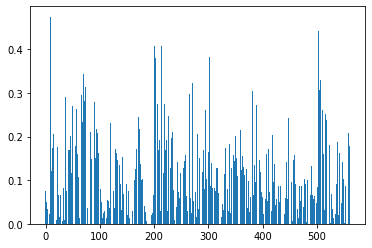

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)
ft=[]

# what are scores for the features
for i in range(len(fs.scores_)):
  if fs.scores_[i] >0.3:
    print('Feature %d: %f' % (i, fs.scores_[i]))
    ft+=[df_cols_name[0][i]]
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
print(len(myunique))
myunique = set(ft) # prints the final list without any duplicates
for i in myunique:
  print("'"+i+"'"+",")
  #These are the features selected for problem 2

17
'fBodyAccJerk-Energy-1',
'tBodyAccJerk-STD-1',
'fBodyAcc-Energy-1',
'tGravityAcc-Max-2',
'tBodyAccJerk-Energy-1',
'tBodyAcc-Max-1',
'fBodyAcc-Mad-1',
'fBodyAcc-BandsEnergyOld-1',
'fBodyAcc-BandsEnergyOld-9',
'fBodyAccJerk-BandsEnergyOld-9',
'fBodyAccJerk-BandsEnergyOld-13',
'fBodyAcc-BandsEnergyOld-13',
'tBodyAcc-STD-1',
'fBodyAccJerk-BandsEnergyOld-1',
'tGravityAcc-Min-2',
'fBodyAcc-STD-1',
'tBodyAccJerk-Max-1',


In [ ]:
xfirstrain=df_moving[['tGravityAccMag-Max-1',
'tBodyAccMag-STD-1',
'fBodyAcc-STD-1',
'fBodyAcc-Mad-1',
'fBodyGyro-MaxInds-3',
'fBodyAccMag-STD-1',
'tGravityAcc-ARCoeff-9',
'tBodyAccMag-Mad-1',
'tGravityAccMag-STD-1',
'fBodyAcc-Max-1',
'fBodyAcc-BandsEnergyOld-1',
'fBodyAccMag-Mad-1',
'fBodyAccJerk-BandsEnergyOld-1',
'tGravityAccMag-Mad-1',
'tGravityAcc-ARCoeff-6',
'fBodyAcc-Energy-1',
'tGravityAcc-ARCoeff-5',
'fBodyAccMag-Mean-1',
'tGravityAcc-ARCoeff-10',
'tGravityAcc-ARCoeff-7',
'tGravityAcc-ARCoeff-11',
'tBodyAccJerk-Max-1',
'fBodyAccMag-Energy-1',
'fBodyAcc-BandsEnergyOld-9',
'fBodyAccMag-Max-1',
'tBodyAccMag-Max-1',
'tGravityAcc-Min-2',
'tBodyAcc-Mad-1',
'fBodyAcc-BandsEnergyOld-13',
'tBodyAcc-STD-1',
'fBodyAccMag-SMA-1',
'tBodyAcc-Energy-1',
'tBodyAcc-Max-1']]

In [ ]:

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', tree_clf), ('xgb', xgb_clf), ('knn', knn_clf)], voting='soft')

In [ ]:
voting_clf.fit(xfirstrain,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xfirstrain, y, test_size=0.2)
y_pred_proba = voting_clf.predict_proba(xfirstrain)
clf = LogisticRegression(solver="liblinear").fit(xfirstrain, y)
preds = clf.predict_proba(xfirstrain)
roc_auc = roc_auc_score(y,preds, multi_class='ovr')
print(roc_auc)
#after using the features the model has a logistic regression performance of 99% which is pretty solid

0.9901896325768501


In [ ]:
accuracy = voting_clf.score(X_test, y_test)
accuracy
#the accuracy of the logistic model is of 1 after the implementation of the features which is weird

0.9954407294832827

In [ ]:
# model definition
model_lg = lm.LogisticRegression( n_jobs=-1, random_state=32 )

# train model
model_lg.fit( X_train, y_train )

LogisticRegression(n_jobs=-1, random_state=32)

              precision    recall  f1-score   support

           1      0.949     0.915     0.932       246
           2      0.917     0.955     0.936       221
           3      0.932     0.932     0.932       191

    accuracy                          0.933       658
   macro avg      0.933     0.934     0.933       658
weighted avg      0.934     0.933     0.933       658

Accuracy: 0.9331306990881459
Weighted F1-Score: 0.9331031969123555
Balanced Accuracy Score: 0.933774150112684
Kappa Score: 0.8992451740206229


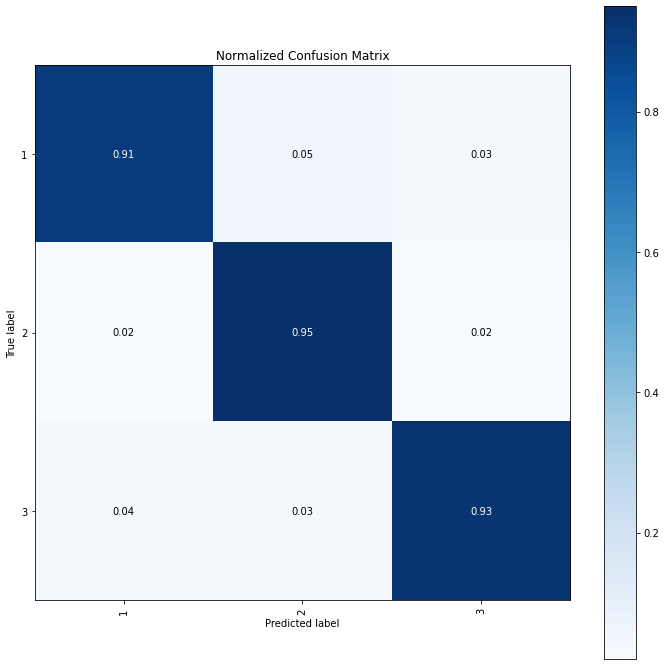

In [ ]:
# prediction
yhat = model_lg.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')
# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#the accuracy in the

#The accuracy is 92% which is good.


In [ ]:
# model definition
model_knn = nb.KNeighborsClassifier( n_neighbors=2, n_jobs=-1 )

# train model
model_knn.fit( xfirstrain, y )

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [ ]:
# prediction
yhat = model_knn.predict( X_test )

              precision    recall  f1-score   support

           1      0.980     1.000     0.990       246
           2      0.973     0.995     0.984       221
           3      1.000     0.948     0.973       191

    accuracy                          0.983       658
   macro avg      0.985     0.981     0.982       658
weighted avg      0.984     0.983     0.983       658

Accuracy: 0.9832826747720365
Weighted F1-Score: 0.9831761279504942
Balanced Accuracy Score: 0.9810396973932546
Kappa Score: 0.9747541864172081


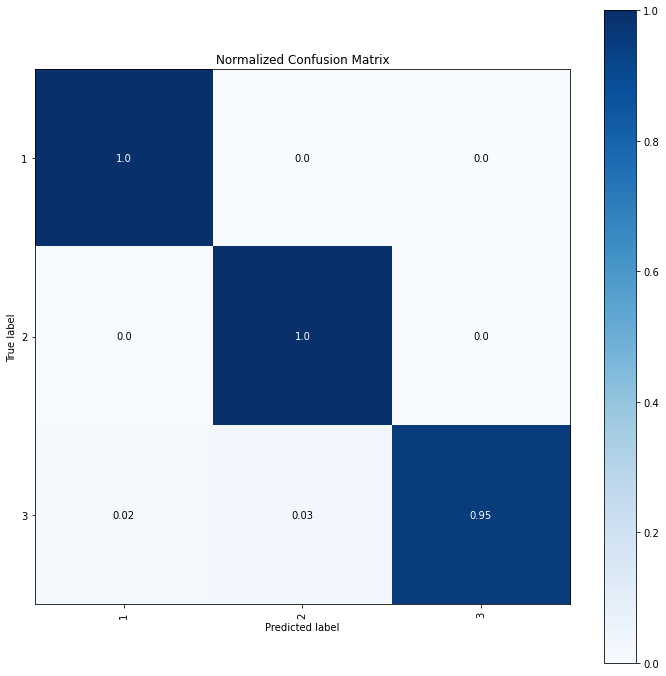

In [ ]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

#This model works truly good, with a 96% accuracy.

In [ ]:
balanced_acc_list = []
for i in range( 1, 30 ):
    print( 'K-value: {}'.format( i ) )
    # model definition
    model_knn = nb.KNeighborsClassifier( n_neighbors=i, n_jobs=-1 )

    # train model
    model_knn.fit( xfirstrain, y )

    # prediction
    yhat = model_knn.predict( X_test )

    # Balanced Accuracy Score
    balanced_acc_list.append( m.balanced_accuracy_score( y_test, yhat ) )

K-value: 1
K-value: 2
K-value: 3
K-value: 4
K-value: 5
K-value: 6
K-value: 7
K-value: 8
K-value: 9
K-value: 10
K-value: 11
K-value: 12
K-value: 13
K-value: 14
K-value: 15
K-value: 16
K-value: 17
K-value: 18
K-value: 19
K-value: 20
K-value: 21
K-value: 22
K-value: 23
K-value: 24
K-value: 25
K-value: 26
K-value: 27
K-value: 28
K-value: 29


Text(0, 0.5, 'Balanced Accuracy')

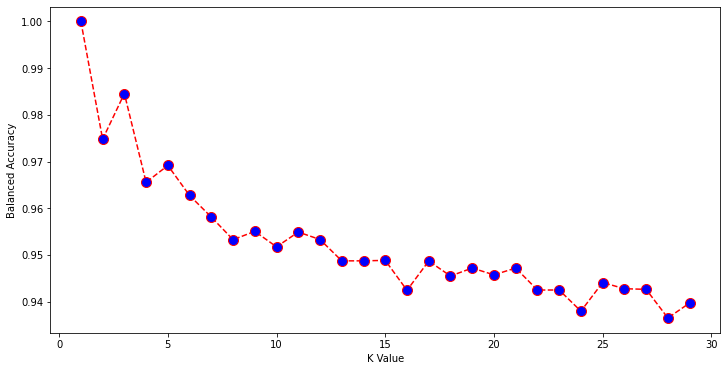

In [ ]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 30 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel( 'K Value' )
plt.ylabel( 'Balanced Accuracy' )
#The model works properly, since a good number k would be for instance 8, we could get an accuracy over 96%

In [ ]:
# model definition
model_svm = svm.SVC(random_state=32)

# model training
model_svm.fit( xfirstrain, y )

SVC(random_state=32)

              precision    recall  f1-score   support

           1      0.967     0.947     0.957       246
           2      0.939     0.968     0.953       221
           3      0.963     0.953     0.958       191

    accuracy                          0.956       658
   macro avg      0.956     0.956     0.956       658
weighted avg      0.956     0.956     0.956       658

Accuracy: 0.9559270516717325
Weighted F1-Score: 0.9559480075482915
Balanced Accuracy Score: 0.9561199481839172
Kappa Score: 0.933556413675916


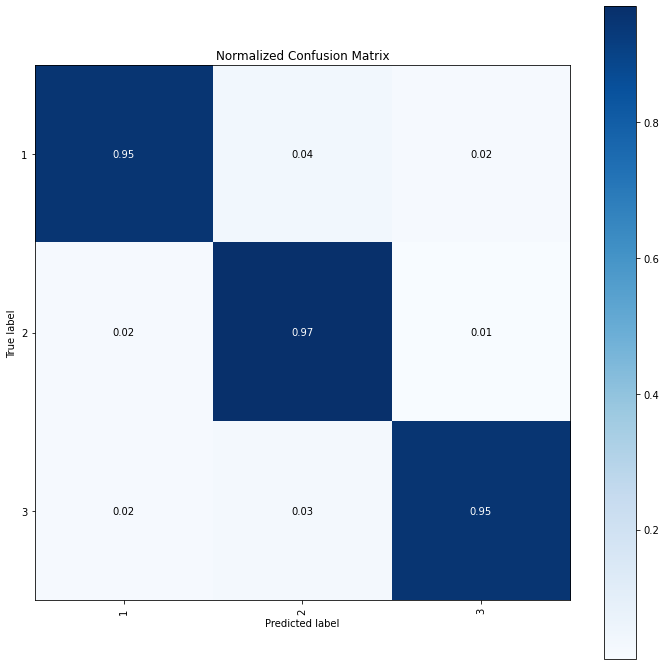

In [ ]:
# prediction
yhat = model_svm.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#The accuracy for SVM is pretty good as well with an accuracy of 96.2%

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [ ]:
data = xfirstest.iloc[:,1:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fBodyAccJerk-BandsEnergyOld-1   3162 non-null   float64
 1   fBodyAcc-STD-1                  3162 non-null   float64
 2   fBodyAcc-Mad-1                  3162 non-null   float64
 3   tBodyAccJerk-STD-1              3162 non-null   float64
 4   fBodyAcc-Energy-1               3162 non-null   float64
 5   tGravityAcc-Min-2               3162 non-null   float64
 6   fBodyAcc-BandsEnergyOld-13      3162 non-null   float64
 7   fBodyAccJerk-BandsEnergyOld-9   3162 non-null   float64
 8   tBodyAcc-STD-1                  3162 non-null   float64
 9   tBodyAccJerk-Max-1              3162 non-null   float64
 10  tBodyAccJerk-Energy-1           3162 non-null   float64
 11  fBodyAcc-BandsEnergyOld-1       3162 non-null   float64
 12  fBodyAccJerk-BandsEnergyOld-13  31

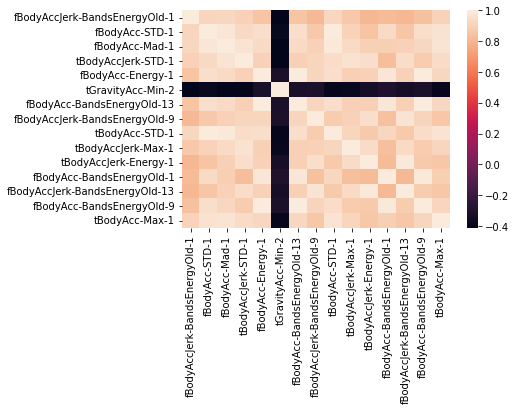

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()
sns.heatmap(corr)

In [ ]:
#predicting for stationary and selecting features for it
x = df_stationary.drop(['position'],axis=1)
x = StandardScaler().fit_transform(x)
y = y_stationary[0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

xTest = test.drop(['position'],axis=1)
xTest = StandardScaler().fit_transform(xTest)
yTest = test['position']
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

Feature 0: 10.168214
Feature 1: 6.750236
Feature 2: 0.104883
Feature 3: 85.320640
Feature 4: 0.463807
Feature 5: 0.825652
Feature 6: 96.858944
Feature 7: 0.486184
Feature 8: 0.901775
Feature 9: 28.309617
Feature 10: 4.178929
Feature 11: 0.119278
Feature 12: 41.503950
Feature 13: 7.044253
Feature 14: 1.714152
Feature 15: 13.512284
Feature 16: 25.767672
Feature 17: 9.113064
Feature 18: 7.248315
Feature 19: 109.690701
Feature 20: 0.587930
Feature 21: 0.877125
Feature 22: 128.268177
Feature 23: 30.442196
Feature 24: 5.520545
Feature 25: 198.960030
Feature 26: 20.250085
Feature 27: 43.889025
Feature 28: 5.057099
Feature 29: 92.087412
Feature 30: 20.489461
Feature 31: 3.545250
Feature 32: 6.995012
Feature 33: 46.972123
Feature 34: 5.388109
Feature 35: 6.076651
Feature 36: 10.296425
Feature 37: 216.460780
Feature 38: 112.248397
Feature 39: 633.489143
Feature 40: 29271.406110
Feature 41: 3700.809134
Feature 42: 1324.769559
Feature 43: 73.274347
Feature 44: 7.425202
Feature 45: 3.379873
Feature

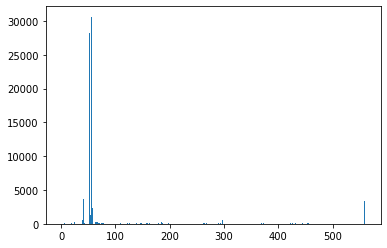

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 40: 0.714565
Feature 41: 0.820824
Feature 49: 0.752670
Feature 50: 0.844829
Feature 52: 0.752477
Feature 53: 0.811691
Feature 56: 0.711507
Feature 558: 0.732141
Feature 559: 0.822715


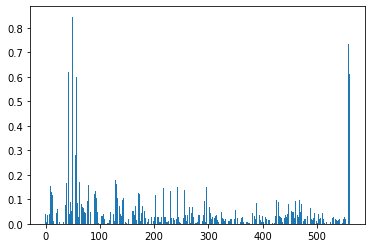

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)
ft=[]

# what are scores for the features
for i in range(len(fs.scores_)):
  if fs.scores_[i] >0.7:
    print('Feature %d: %f' % (i, fs.scores_[i]))
    ft+=[df_cols_name[0][i]]
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [ ]:
print(len(ft))
myunique = set(ft) # prints the final list without any duplicates
for i in myunique:
  print("'"+i+"'"+",")

9
'tGravityAcc-Max-2',
'tGravityAcc-Min-1',
'tGravityAcc-Mean-1',
'tGravityAcc-Max-1',
'tGravityAcc-Mean-2',
'tYAxisAcc-AngleWRTGravity-1',
'tGravityAcc-Min-2',
'tGravityAcc-Energy-1',
'tXAxisAcc-AngleWRTGravity-1',


In [ ]:
xfirstrain=df_stationary[['tGravityAcc-Min-1',
'tYAxisAcc-AngleWRTGravity-1',
'tXAxisAcc-AngleWRTGravity-1',
'tGravityAcc-Max-1',
'tGravityAcc-Min-2',
'tGravityAcc-Mean-2',
'tGravityAcc-Mean-1',
'tGravityAcc-Energy-1',
'tGravityAcc-Max-2',]]

In [ ]:

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', tree_clf), ('xgb', xgb_clf), ('knn', knn_clf)], voting='soft')

In [ ]:
voting_clf.fit(xfirstrain,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xfirstrain, y, test_size=0.2)
y_pred_proba = voting_clf.predict_proba(xfirstrain)
clf = LogisticRegression(solver="liblinear").fit(xfirstrain, y)
preds = clf.predict_proba(xfirstrain)
roc_auc = roc_auc_score(y,preds, multi_class='ovr')
print(roc_auc)
#after using the features the model has a logistic regression performance of 97.8% which is pretty solid

0.9787715662498857


In [ ]:
accuracy = voting_clf.score(X_test, y_test)
accuracy
#the accuracy of the logistic model is of 99.15 %after the implementation of the features which is really good

0.9915254237288136

In [ ]:
# model definition
model_lg = lm.LogisticRegression( n_jobs=-1, random_state=32 )

# train model
model_lg.fit( X_train, y_train )

LogisticRegression(n_jobs=-1, random_state=32)

              precision    recall  f1-score   support

           4      0.866     0.796     0.830       260
           5      0.839     0.894     0.866       292
           6      0.989     0.996     0.993       274

    accuracy                          0.897       826
   macro avg      0.898     0.895     0.896       826
weighted avg      0.897     0.897     0.896       826

Accuracy: 0.8970944309927361
Weighted F1-Score: 0.896482826847396
Balanced Accuracy Score: 0.8954466091852353
Kappa Score: 0.8452501653074719


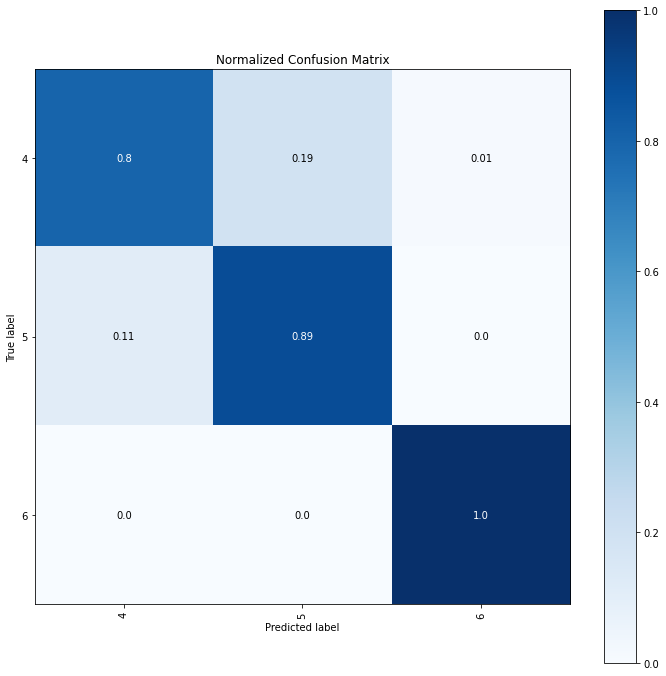

In [ ]:
# prediction
yhat = model_lg.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')
# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#the accuracy in the

#The accuracy is 89% it isnt that bad but maybe I can find a better one.

In [ ]:
# model definition
model_knn = nb.KNeighborsClassifier( n_neighbors=2, n_jobs=-1 )

# train model
model_knn.fit( xfirstrain, y )

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [ ]:
# prediction
yhat = model_knn.predict( X_test )

              precision    recall  f1-score   support

           4      0.952     1.000     0.976       260
           5      1.000     0.955     0.977       292
           6      1.000     1.000     1.000       274

    accuracy                          0.984       826
   macro avg      0.984     0.985     0.984       826
weighted avg      0.985     0.984     0.984       826

Accuracy: 0.9842615012106537
Weighted F1-Score: 0.9842742743291449
Balanced Accuracy Score: 0.9851598173515982
Kappa Score: 0.9763871296882697


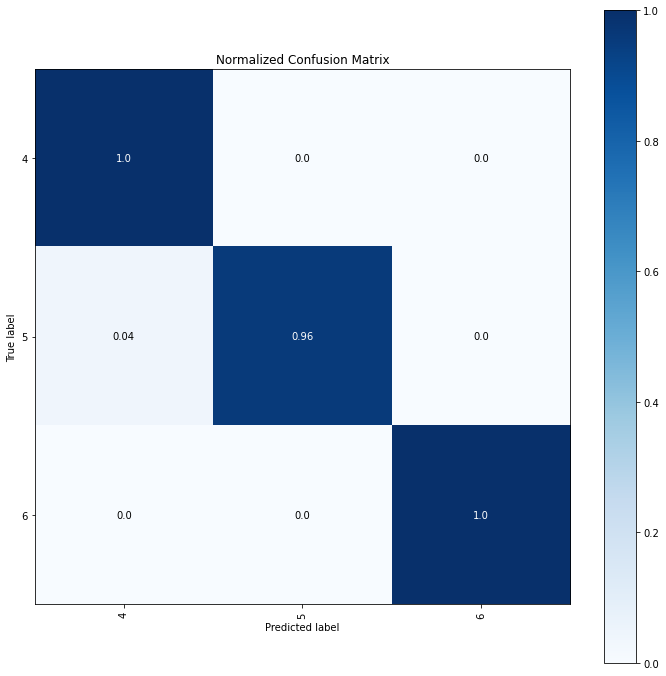

In [ ]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

#This model works truly good, with a 98.7% accuracy which is the best one till now.

In [ ]:
balanced_acc_list = []
for i in range( 1, 30 ):
    print( 'K-value: {}'.format( i ) )
    # model definition
    model_knn = nb.KNeighborsClassifier( n_neighbors=i, n_jobs=-1 )

    # train model
    model_knn.fit( xfirstrain, y )

    # prediction
    yhat = model_knn.predict( X_test )

    # Balanced Accuracy Score
    balanced_acc_list.append( m.balanced_accuracy_score( y_test, yhat ) )

K-value: 1
K-value: 2
K-value: 3
K-value: 4
K-value: 5
K-value: 6
K-value: 7
K-value: 8
K-value: 9
K-value: 10
K-value: 11
K-value: 12
K-value: 13
K-value: 14
K-value: 15
K-value: 16
K-value: 17
K-value: 18
K-value: 19
K-value: 20
K-value: 21
K-value: 22
K-value: 23
K-value: 24
K-value: 25
K-value: 26
K-value: 27
K-value: 28
K-value: 29


Text(0, 0.5, 'Balanced Accuracy')

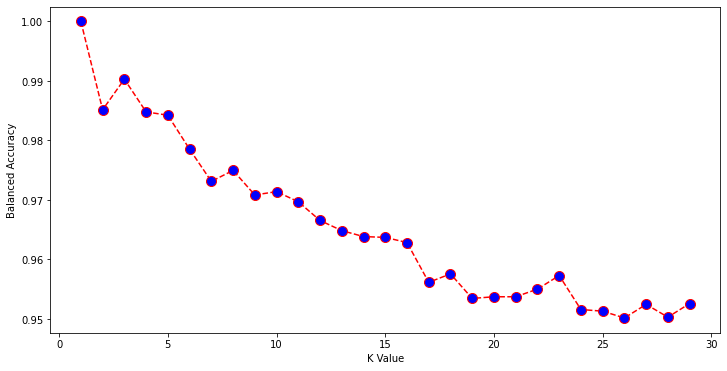

In [ ]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 30 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel( 'K Value' )
plt.ylabel( 'Balanced Accuracy' )
#The model works properly, since a good number k would be for instance 10, we could get an accuracy over 97.5%

In [ ]:
# model definition
model_svm = svm.SVC(random_state=32)

# model training
model_svm.fit( xfirstrain, y )

SVC(random_state=32)

In [ ]:

data = xfirstrain.iloc[:,1:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129 entries, 0 to 7675
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tYAxisAcc-AngleWRTGravity-1  4129 non-null   float64
 1   tXAxisAcc-AngleWRTGravity-1  4129 non-null   float64
 2   tGravityAcc-Max-1            4129 non-null   float64
 3   tGravityAcc-Min-2            4129 non-null   float64
 4   tGravityAcc-Mean-2           4129 non-null   float64
 5   tGravityAcc-Mean-1           4129 non-null   float64
 6   tGravityAcc-Energy-1         4129 non-null   float64
dtypes: float64(7)
memory usage: 258.1 KB


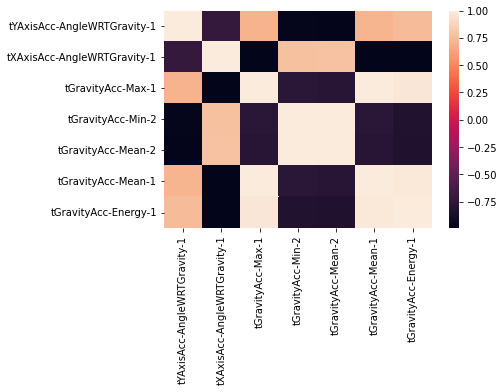

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()
sns.heatmap(corr)

              precision    recall  f1-score   support

           4      0.867     0.831     0.849       260
           5      0.855     0.890     0.872       292
           6      1.000     0.996     0.998       274

    accuracy                          0.907       826
   macro avg      0.908     0.906     0.906       826
weighted avg      0.907     0.907     0.907       826

Accuracy: 0.9067796610169492
Weighted F1-Score: 0.9066975339209685
Balanced Accuracy Score: 0.9058435182122814
Kappa Score: 0.8598969966913822


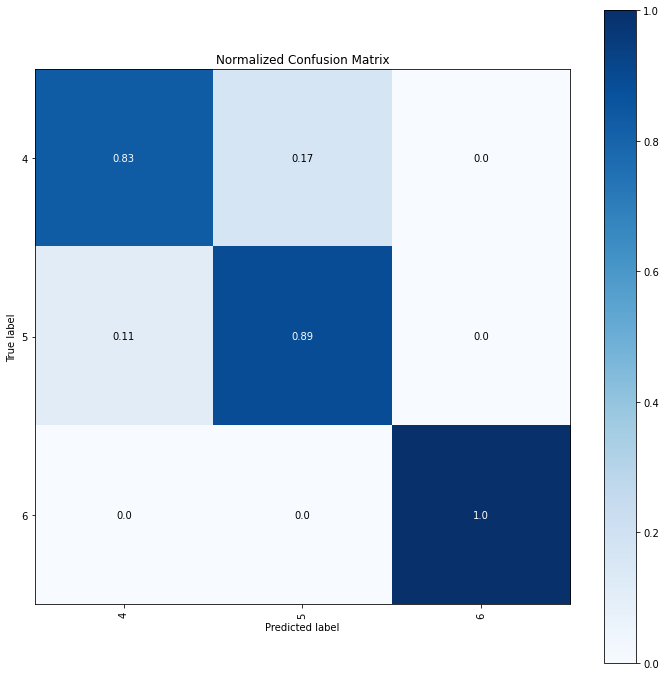

In [ ]:
# prediction
yhat = model_svm.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#The accuracy for SVM is pretty good as well with an accuracy of 89% which isnt bad at all but isnt the best

In [ ]:
#predicting for stationary and selecting features for it
x = df_transitions.drop(['position'],axis=1)
x = StandardScaler().fit_transform(x)
y = y_transitions[0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

xTest = test.drop(['position'],axis=1)
xTest = StandardScaler().fit_transform(xTest)
yTest = test['position']
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

Feature 0: 237.769920
Feature 1: 132.170745
Feature 2: 73.152452
Feature 3: 18.416003
Feature 4: 1.786614
Feature 5: 6.778135
Feature 6: 23.964859
Feature 7: 1.753683
Feature 8: 6.502514
Feature 9: 116.800840
Feature 10: 105.413570
Feature 11: 51.976681
Feature 12: 59.440544
Feature 13: 51.122381
Feature 14: 29.877886
Feature 15: 18.008742
Feature 16: 25.158513
Feature 17: 6.453216
Feature 18: 10.750388
Feature 19: 27.445749
Feature 20: 2.443729
Feature 21: 5.178460
Feature 22: 219.425733
Feature 23: 112.553203
Feature 24: 67.122860
Feature 25: 4.517976
Feature 26: 1.716135
Feature 27: 6.084781
Feature 28: 6.137177
Feature 29: 5.303016
Feature 30: 1.908394
Feature 31: 1.472826
Feature 32: 2.480279
Feature 33: 2.805741
Feature 34: 1.574353
Feature 35: 3.696596
Feature 36: 2.846667
Feature 37: 27.711091
Feature 38: 13.666460
Feature 39: 10.541408
Feature 40: 141.315454
Feature 41: 107.884638
Feature 42: 44.393290
Feature 43: 28.762284
Feature 44: 16.773472
Feature 45: 9.692295
Feature 46

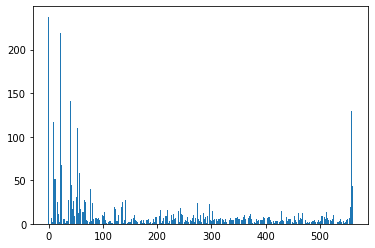

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.825617
Feature 1: 0.634353
Feature 2: 0.425244
Feature 9: 0.675354
Feature 10: 0.585739
Feature 12: 0.528359
Feature 22: 0.587298
Feature 23: 0.489466
Feature 40: 0.478974
Feature 41: 0.614664
Feature 50: 0.554261
Feature 52: 0.536591
Feature 53: 0.640826
Feature 56: 0.494740
Feature 120: 0.455414
Feature 122: 0.463492
Feature 558: 0.454510
Feature 559: 0.606614


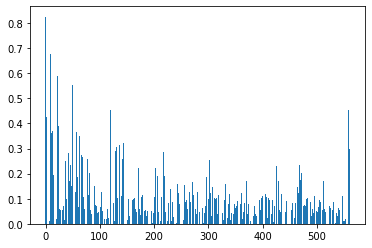

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)
ft=[]

# what are scores for the features
for i in range(len(fs.scores_)):
  if fs.scores_[i] >0.4:
    print('Feature %d: %f' % (i, fs.scores_[i]))
    ft+=[df_cols_name[0][i]]
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
print(len(ft))
myunique = set(ft) # prints the final list without any duplicates
for i in myunique:
  print("'"+i+"'"+",")

18
'tBodyAcc-Max-2',
'tGravityAcc-Max-2',
'tBodyAcc-Max-1',
'tGravityAcc-Min-1',
'tXAxisAcc-AngleWRTGravity-1',
'tBodyGyro-Mean-3',
'tBodyAcc-ropy-1',
'tGravityAcc-Mean-1',
'tBodyAcc-Mean-1',
'tGravityAcc-Mean-2',
'tBodyAcc-Mean-3',
'tBodyGyro-Mean-1',
'tYAxisAcc-AngleWRTGravity-1',
'tBodyAcc-Mean-2',
'tGravityAcc-Min-2',
'tGravityAcc-Energy-1',
'tBodyAcc-Min-1',


In [ ]:
xfirstrain=df_transitions[['tBodyAcc-Max-2',
'tGravityAcc-Max-2',
'tBodyAcc-Max-1',
'tGravityAcc-Min-1',
'tBodyAcc-ropy-1',
'tBodyAcc-Mean-1',
'tGravityAcc-Mean-2',
'tYAxisAcc-AngleWRTGravity-1',
'tBodyAcc-Mean-2',
'tGravityAcc-Min-2',
'tBodyAcc-Min-1']]

In [ ]:

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', tree_clf), ('xgb', xgb_clf), ('knn', knn_clf)], voting='soft')

In [ ]:
xfirstrain = xfirstrain.loc[:,~xfirstrain.columns.duplicated()]

In [ ]:
voting_clf.fit(xfirstrain,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xfirstrain, y, test_size=0.2)
y_pred_proba = voting_clf.predict_proba(xfirstrain)
clf = LogisticRegression(solver="liblinear").fit(xfirstrain, y)
preds = clf.predict_proba(xfirstrain)
roc_auc = roc_auc_score(y,preds, multi_class='ovr')
print(roc_auc)
#after using the features the model has a logistic regression performance of 94.4% which is pretty solid

0.9440880801961643


In [ ]:
accuracy = voting_clf.score(X_test, y_test)
accuracy
#the accuracy of the logistic model is of 98.5 which is good

1.0

              precision    recall  f1-score   support

           7      0.769     0.714     0.741        14
           8      0.833     0.833     0.833         6
           9      1.000     0.846     0.917        13
          10      0.625     0.357     0.455        14
          11      0.700     0.875     0.778        16
          12      0.308     0.500     0.381         8

    accuracy                          0.690        71
   macro avg      0.706     0.688     0.684        71
weighted avg      0.721     0.690     0.692        71

Accuracy: 0.6901408450704225
Weighted F1-Score: 0.6921512238413646
Balanced Accuracy Score: 0.6876526251526252
Kappa Score: 0.6230694980694982


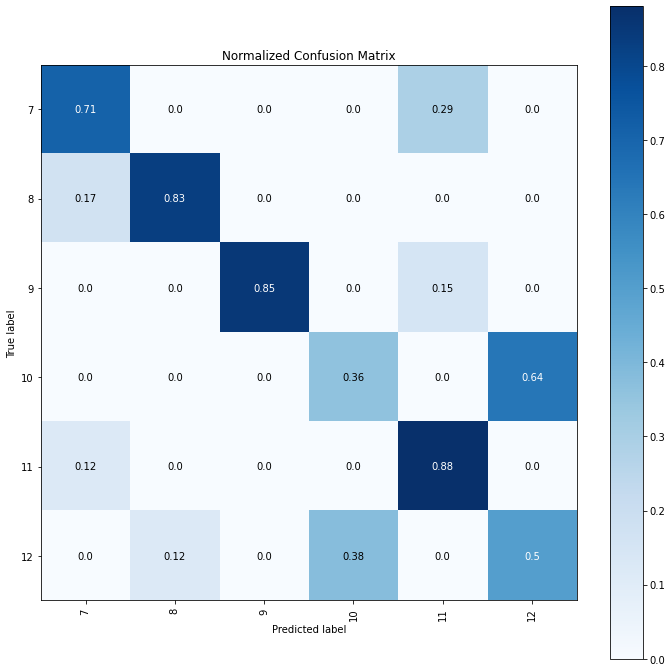

In [ ]:
# model definition
model_lg = lm.LogisticRegression( n_jobs=-1, random_state=32 )

# train model
model_lg.fit( X_train, y_train )

# prediction
yhat = model_lg.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')
# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#the accuracy in the

#The accuracy is 64% accurate which is pretty mediocre to say the least

              precision    recall  f1-score   support

           7      0.824     1.000     0.903        14
           8      0.833     0.833     0.833         6
           9      0.812     1.000     0.897        13
          10      0.778     1.000     0.875        14
          11      1.000     0.688     0.815        16
          12      1.000     0.375     0.545         8

    accuracy                          0.845        71
   macro avg      0.875     0.816     0.811        71
weighted avg      0.873     0.845     0.830        71

Accuracy: 0.8450704225352113
Weighted F1-Score: 0.8302958747153392
Balanced Accuracy Score: 0.8159722222222223
Kappa Score: 0.8098368638909179


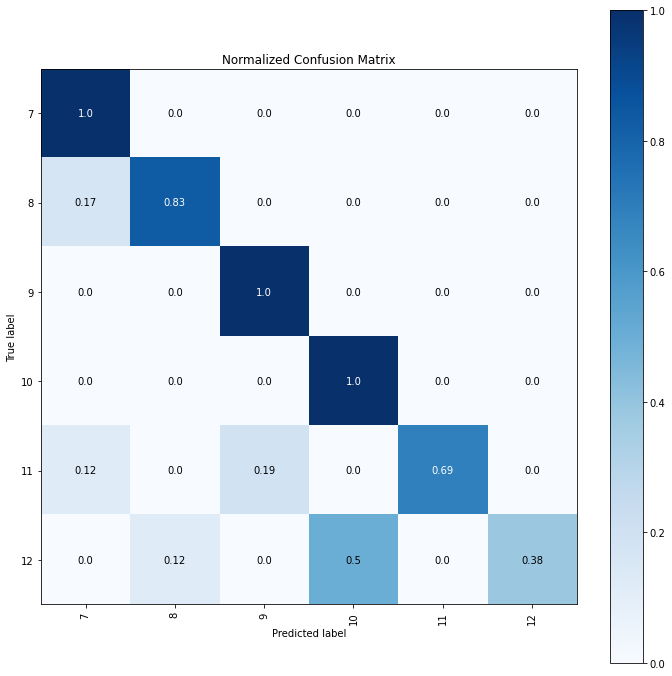

In [ ]:
# model definition
model_knn = nb.KNeighborsClassifier( n_neighbors=2, n_jobs=-1 )

# train model
model_knn.fit( xfirstrain, y )

# prediction
yhat = model_knn.predict( X_test )


# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

#The model works pretty well until it gets to activities 11 and 12

In [ ]:
balanced_acc_list = []
for i in range( 1, 30 ):
    print( 'K-value: {}'.format( i ) )
    # model definition
    model_knn = nb.KNeighborsClassifier( n_neighbors=i, n_jobs=-1 )

    # train model
    model_knn.fit( xfirstrain, y )

    # prediction
    yhat = model_knn.predict( X_test )

    # Balanced Accuracy Score
    balanced_acc_list.append( m.balanced_accuracy_score( y_test, yhat ) )

K-value: 1
K-value: 2
K-value: 3
K-value: 4
K-value: 5
K-value: 6
K-value: 7
K-value: 8
K-value: 9
K-value: 10
K-value: 11
K-value: 12
K-value: 13
K-value: 14
K-value: 15
K-value: 16
K-value: 17
K-value: 18
K-value: 19
K-value: 20
K-value: 21
K-value: 22
K-value: 23
K-value: 24
K-value: 25
K-value: 26
K-value: 27
K-value: 28
K-value: 29


Text(0, 0.5, 'Balanced Accuracy')

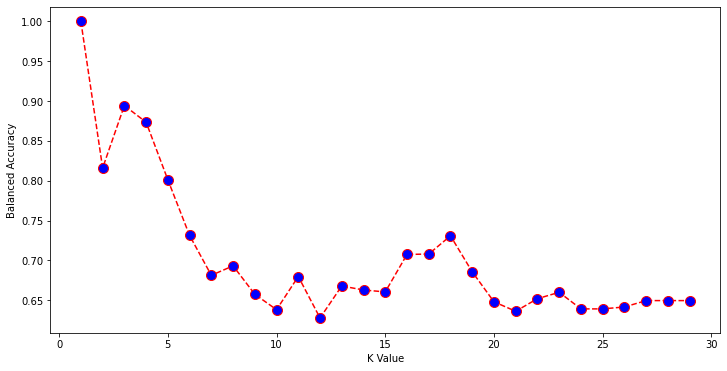

In [ ]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 30 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel( 'K Value' )
plt.ylabel( 'Balanced Accuracy' )
#The model works best when k value is between 8 and 13 apparently

              precision    recall  f1-score   support

           7      0.786     0.786     0.786        14
           8      0.833     0.833     0.833         6
           9      0.923     0.923     0.923        13
          10      0.769     0.714     0.741        14
          11      0.765     0.812     0.788        16
          12      0.500     0.500     0.500         8

    accuracy                          0.775        71
   macro avg      0.763     0.761     0.762        71
weighted avg      0.775     0.775     0.774        71

Accuracy: 0.7746478873239436
Weighted F1-Score: 0.7743159292455069
Balanced Accuracy Score: 0.7614850427350427
Kappa Score: 0.7244056283357594


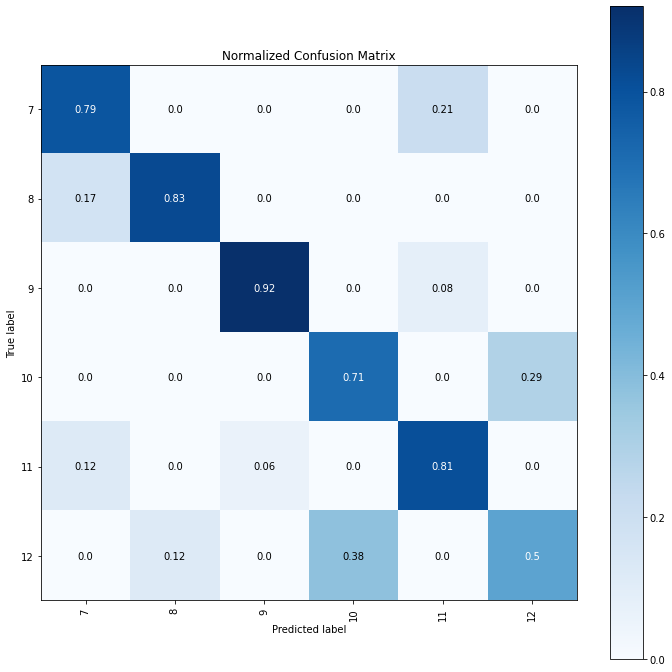

In [ ]:
# model definition
model_svm = svm.SVC(random_state=32)

# model training
model_svm.fit( xfirstrain, y )

# prediction
yhat = model_svm.predict( X_test )
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )
#The accuracy for SVM is pretty good as well with an accuracy of 89% which isnt bad at all but isnt the best

In [ ]:
data = xfirstrain.iloc[:,1:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 14 to 7676
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tGravityAcc-Max-2            352 non-null    float64
 1   tBodyAcc-Max-1               352 non-null    float64
 2   tGravityAcc-Min-1            352 non-null    float64
 3   tBodyAcc-ropy-1              352 non-null    float64
 4   tBodyAcc-Mean-1              352 non-null    float64
 5   tGravityAcc-Mean-2           352 non-null    float64
 6   tYAxisAcc-AngleWRTGravity-1  352 non-null    float64
 7   tBodyAcc-Mean-2              352 non-null    float64
 8   tGravityAcc-Min-2            352 non-null    float64
dtypes: float64(9)
memory usage: 27.5 KB


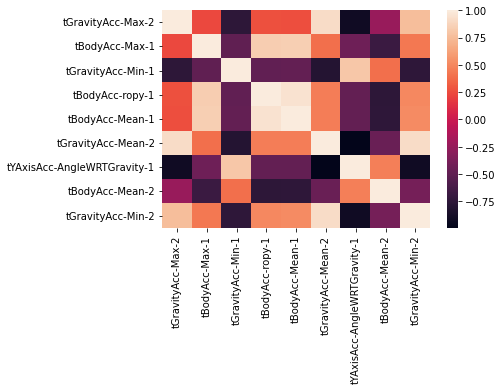

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()
sns.heatmap(corr)

ANSWERS:
Problem 1
>In conclusion the best model for the moving activities is Kneighbors classifiers with a score of almost 96% accuracy.

>After analyzing the three accuracy scores and Kappa scores, I determined that without a shadow of a doubt, the best model for the stationary data frame is Kneighbors classification with almost 98% accuracy.

>After reviewing the models it is obvious that the best one is KneighborsClassifier, nonetheless. It has a low accuracy score when analyzing the last two activities. It was already mentioned that this might happen because of the big bias that the original df had in the different activities.

Problem 2:

>The method used for feature selection was ANOVA, given that the data frame lacked many categorical variables that could make correlations easier. Besides having an enormous amount of features that made it hard to understand where could there be a correlation between variables.
For choosing the minimal set of features I considered it based on the information gained on them. This was subjective which made me hesitant if it was the right way to approach the problem. Nonetheless not knowing another way I chose this way to answer the question.

>For the first group, I noticed that there were low scores on information gain, which is why the standard for selecting the features was set at 40% information gained. From this criteria, we selected 17 features

>On the stationary dataset I was a little more strict on the feature selection based on the argument that there was more recollection of data in this one. Besides the fact that these features have greater information gained scores. The requisite to get the feature list was 70% information gained.
After these criteria, I selected 9 variables that explained the data frame

>On the “transitionary” data frame after viewing the performance of the model on the past data frame I decided to go back and accept an information score of almost 40% again. There were really few variables that could gain information better than 40%. This is clear because of the bias of the data recollection.
The features were 18

Problem 3:

> On moving as seen here all variables work smoothly to separate the activities, I think this one is hard to pinpoint so I would say all variables work almost just as well between 0.8/1 .


>For this one, it was quite obvious that the one that explains best and separates properly are feature white and skin color.

>On this one again it is easy to identify which are the features that separate properly the data frame





